## Data exploration and processing - GMMA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data/artist_realease_unique_LFM_Bey_no_dup.csv", sep="\t")
iso_country=pd.read_csv("data/data_iso3166_2d.csv")
events = pd.read_csv("data/events.csv")
users = pd.read_csv("data/LFM-1b_users.txt", sep='\t')
beyms = pd.read_csv("data/beyms.csv")
ms = pd.read_csv("data/ms.csv")

In [3]:
events = events.query('user_id!=3532686')
users = users.query('user_id!=3532686')

In [4]:
palette ={"Group head": "#3b5b92", "Group mid": "#01889f", "Group tail": "#feb308"}

In [5]:
df['artist_country'] = df['location_name'].map(iso_country.set_index('Name')['Code'])

In [6]:
# Drop duplicated by id but keeping last apparence

df = df.drop_duplicates(['artist_id','album_id'],keep='last').reset_index()

In [7]:
# Fixing iso names

df['artist_country'] = df['artist_country'].fillna('NA')
users['country'] = users['country'].replace('UK','GB')
df['artist_country'] = df['artist_country'].replace('UK','GB')

In [8]:
df2 = df[['realease_artist','artist_country']]
df2_b = df[['artist_id','album_id','artist_country']]
df3 = df2.drop_duplicates()
df3_b = df2_b.drop_duplicates()
df3_bx = df3_b[['artist_id','artist_country']].drop_duplicates()

In [9]:
artist_country = df3['artist_country'].value_counts().reset_index()

In [10]:
artist_country = artist_country.rename(columns={'index':'country','artist_country':'count'})

In [11]:
users = users.query('country == country').reset_index()

In [12]:
users_country = users['country'].value_counts().reset_index()
users_country = users_country.rename(columns={'index':'country','country':'count'})

In [13]:
result = pd.merge(events, users, on=['user_id'])

In [14]:
result = pd.merge(result, df3_b, how='left', on=['artist_id','album_id'])

In [15]:
result['artist_country'] = result['artist_country'].fillna('Unknown')

In [16]:
result.head() # dataset with country for user and artist

,user_id,artist_id,album_id,track_id,timestamp,index,country,age,gender,playcount,registered_unixtime,artist_country
0,31435741,21,31,53,1370977938,51552,RU,18,m,88048,1279825291,US
1,31435741,21,31,53,1370977728,51552,RU,18,m,88048,1279825291,US
2,31435741,21,31,53,1370977518,51552,RU,18,m,88048,1279825291,US
3,31435741,21,31,53,1370977308,51552,RU,18,m,88048,1279825291,US
4,31435741,21,31,53,1370977098,51552,RU,18,m,88048,1279825291,US


#### Processing artist country

In [17]:
# For artist country unknown find the popular country in user and assing the country to artist

# "we propose to assign the cultural features of the country in which the track is most popular to each track. We argue that the track is most characteristic and representative for the country in which the track is most popular."
# Zangerle, E., Pichl, M. and Schedl, M. (2020) User Models for Culture-Aware Music Recommendation: Fusing Acoustic and Cultural Cues. Transactions of the International Society for Music Information Retrieval. [online].  3 (1), Ubiquity Press, pp.1–16.
# (Zangerle, Pichl and Schedl, 2020)

result_unk=result.query('artist_country=="Unknown"')

In [18]:
result_kwn=result.query('artist_country!="Unknown"')

In [19]:
result_kwn

,user_id,artist_id,album_id,track_id,timestamp,index,country,age,gender,playcount,registered_unixtime,artist_country
0,31435741,21,31,53,1370977938,51552,RU,18,m,88048,1279825291,US
1,31435741,21,31,53,1370977728,51552,RU,18,m,88048,1279825291,US
2,31435741,21,31,53,1370977518,51552,RU,18,m,88048,1279825291,US
3,31435741,21,31,53,1370977308,51552,RU,18,m,88048,1279825291,US
4,31435741,21,31,53,1370977098,51552,RU,18,m,88048,1279825291,US
...,...,...,...,...,...,...,...,...,...,...,...,...
16687322,49091935,2558,30248,97380,1334407012,102958,DE,23,m,207,1333926738,US
16687349,49091935,12472,731083,1862201,1333929943,102958,DE,23,m,207,1333926738,SE
16687350,49091935,61827,243975,673987,1333929606,102958,DE,23,m,207,1333926738,US
16687351,49091935,5384,10859,30839,1333928847,102958,DE,23,m,207,1333926738,US


In [20]:
#Finding the artist that already are knowed and matchet with the unknowed

only_artist_country = pd.merge(result_unk[['artist_id']].drop_duplicates(),result_kwn[['artist_id','artist_country']].drop_duplicates(), on='artist_id')

In [21]:
result_unk['artist_country'] = result_unk['artist_id'].map(only_artist_country.set_index('artist_id')['artist_country'])

In [22]:
result_unk['artist_country'] = result_unk['artist_country'].fillna('Unknown')

In [23]:
result_unk1 = result_unk.query('artist_country!="Unknown"')
result_unk1

,user_id,artist_id,album_id,track_id,timestamp,index,country,age,gender,playcount,registered_unixtime,artist_country
138,31435741,44,65,127,1369059233,51552,RU,18,m,88048,1279825291,GB
139,31435741,44,65,127,1369058969,51552,RU,18,m,88048,1279825291,GB
140,31435741,44,65,127,1369058705,51552,RU,18,m,88048,1279825291,GB
343,31435741,44,65,374,1359319358,51552,RU,18,m,88048,1279825291,GB
344,31435741,44,65,374,1359319133,51552,RU,18,m,88048,1279825291,GB
...,...,...,...,...,...,...,...,...,...,...,...,...
16687327,49091935,111,207,281305,1334272056,102958,DE,23,m,207,1333926738,DE
16687328,49091935,111,207,423,1334271674,102958,DE,23,m,207,1333926738,DE
16687329,49091935,111,207,281306,1334271414,102958,DE,23,m,207,1333926738,DE
16687330,49091935,111,207,2273,1334271100,102958,DE,23,m,207,1333926738,DE


In [24]:
world_country_unk = result_unk[['track_id','album_id','artist_id', 'artist_country', 'country']].query('artist_country!="Unknown"').groupby(['artist_country']).nunique().reset_index()
world_country_unk = world_country_unk.rename(columns={'artist_country':'Code'})

In [25]:
# Finding the 2 layer of unknown artist to use the popularity technique

result_unk2 = result_unk.query('artist_country=="Unknown"')
result_unk_grp = result_unk2.groupby(['artist_id', 'track_id','country']).size()
top_unk = result_unk_grp.groupby(level=[0,1]).nlargest(1).reset_index(level=[0,1], drop=True).reset_index()
top_unk = top_unk.rename(columns={'country':'artist_country'})
result_unk2 = result_unk2.drop(columns='artist_country')
result_unk2 = pd.merge(result_unk2,top_unk[['artist_id','track_id','artist_country']], on=['artist_id','track_id'])

In [26]:
result_unk2

,user_id,artist_id,album_id,track_id,timestamp,index,country,age,gender,playcount,registered_unixtime,artist_country
0,31435741,65,118,219,1361220299,51552,RU,18,m,88048,1279825291,RU
1,31435741,65,118,219,1361220097,51552,RU,18,m,88048,1279825291,RU
2,31435741,65,118,219,1361219895,51552,RU,18,m,88048,1279825291,RU
3,31435741,65,118,219,1361219692,51552,RU,18,m,88048,1279825291,RU
4,31435741,65,118,219,1361219490,51552,RU,18,m,88048,1279825291,RU
...,...,...,...,...,...,...,...,...,...,...,...,...
3300928,49091935,254478,889951,8851152,1344850648,102958,DE,23,m,207,1333926738,DE
3300929,49091935,254478,889951,8851227,1344850461,102958,DE,23,m,207,1333926738,DE
3300930,49091935,254478,889951,2253120,1344850123,102958,DE,23,m,207,1333926738,DE
3300931,49091935,254478,889951,5712738,1344849919,102958,DE,23,m,207,1333926738,DE


In [27]:
world_country_unk2 = result_unk2[['track_id','album_id','artist_id', 'artist_country', 'country']].groupby(['artist_country']).nunique().reset_index()
world_country_unk2 = world_country_unk2.rename(columns={'artist_country':'Code'})

### New dataset with artist's origin country 

In [28]:
events_final = pd.concat([result_kwn,result_unk1,result_unk2])
#events_final.to_csv("data/LFM1-BeyMS-artist_country.csv")
events_final

,user_id,artist_id,album_id,track_id,timestamp,index,country,age,gender,playcount,registered_unixtime,artist_country
0,31435741,21,31,53,1370977938,51552,RU,18,m,88048,1279825291,US
1,31435741,21,31,53,1370977728,51552,RU,18,m,88048,1279825291,US
2,31435741,21,31,53,1370977518,51552,RU,18,m,88048,1279825291,US
3,31435741,21,31,53,1370977308,51552,RU,18,m,88048,1279825291,US
4,31435741,21,31,53,1370977098,51552,RU,18,m,88048,1279825291,US
...,...,...,...,...,...,...,...,...,...,...,...,...
3300928,49091935,254478,889951,8851152,1344850648,102958,DE,23,m,207,1333926738,DE
3300929,49091935,254478,889951,8851227,1344850461,102958,DE,23,m,207,1333926738,DE
3300930,49091935,254478,889951,2253120,1344850123,102958,DE,23,m,207,1333926738,DE
3300931,49091935,254478,889951,5712738,1344849919,102958,DE,23,m,207,1333926738,DE


#### GMMA processing - IDF

In [29]:
events_final_unique_tracks = events_final[['track_id','artist_country']].drop_duplicates()

In [30]:
tracks_country = events_final_unique_tracks.groupby(['artist_country']).size().reset_index()
tracks_country = tracks_country.rename(columns={0:'tracks_country','artist_country':'Code'})

In [31]:
world_country_data = events_final[['track_id','album_id','artist_id', 'artist_country', 'country']].groupby(['artist_country']).nunique().reset_index()
world_country_data = world_country_data.rename(columns={'artist_country':'Code'})

In [32]:
un=pd.DataFrame([['Unknown']],columns=['Code'])
cod=iso_country[['Code']].drop_duplicates()
iso_ctr= pd.concat([un,cod]).reset_index(drop=True)
iso_id=iso_ctr.reset_index().rename(columns={'index':'country_id'})

In [33]:
user_country = events_final[['user_id','country']].drop_duplicates().groupby('country').size().reset_index()

In [34]:
user_country = user_country.rename(columns={'country':'Code',0:'users'})

In [35]:
country_total = pd.merge(pd.merge(pd.merge(iso_id, user_country, how='left', on=['Code']),world_country_data, how='left', on=['Code']),tracks_country, how='left', on=['Code'])
country_total = country_total.rename(columns={'playcount_x':'artist','playcount_y':'tracks'})
country_total = country_total.fillna(0)

In [36]:
country_total_final = country_total.query('tracks_country!=0')

In [37]:
n_documents_all = len(events_final)
n_documents = len(events_final_unique_tracks)
print(n_documents_all)

16687354


In [38]:
print(n_documents)
country_total_final['idf_scores'] = country_total_final['tracks_country'].map(lambda x: np.log10(n_documents / x) )
country_total_final['idf_scores_all'] = country_total_final['tracks_country'].map(lambda x: np.log10(n_documents_all / x) )

1084921


In [39]:
country_total_30 = country_total_final

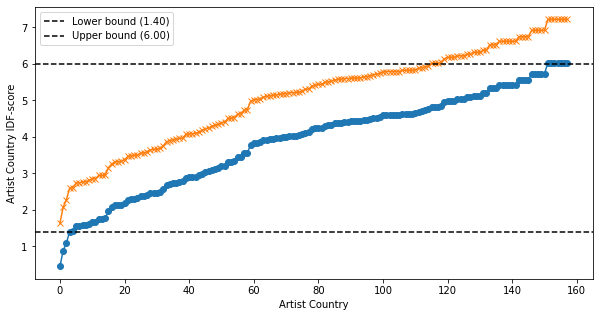

In [40]:
# GMMA score per artist country
plt.figure(figsize=(10,5))
plt.plot(country_total_30[['idf_scores']].sort_values(by='idf_scores',ascending=True).reset_index(drop=True), "-o")
plt.plot(country_total_30[['idf_scores_all']].sort_values(by='idf_scores_all',ascending=True).reset_index(drop=True), "-x")
plt.xlabel("Artist Country")
plt.ylabel("Artist Country IDF-score")
plt.axhline(y=1.4, linestyle="--", color="black", label="Lower bound (1.40)")
plt.axhline(y=6.0, linestyle="--", color="black", label="Upper bound (6.00)")
plt.legend()
plt.grid(False)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


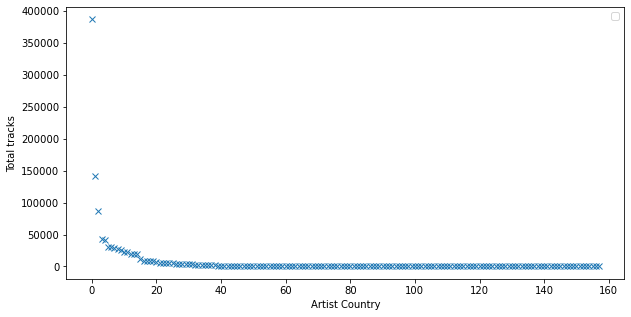

In [41]:
# Long tail per artist country
plt.figure(figsize=(10,5))
plt.plot(country_total_30[['tracks_country']].sort_values(by='tracks_country', ascending=False).reset_index(drop=True), "x")
plt.xlabel("Artist Country")
plt.ylabel("Total tracks")
plt.legend()
plt.grid(False)
plt.show()

In [42]:
def f(x, n, a, b):
    return b/((n/x)**a + 1)

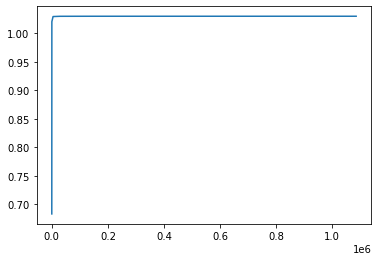

In [43]:
x = np.cumsum(country_total_30['tracks_country'])
plt.plot(x, f(x, 2, .978, 1.03))
plt.show()

In [44]:
cumulative = np.cumsum(country_total_30[['tracks_country']].sort_values(by='tracks_country', ascending=False).reset_index(drop=True))

In [45]:
#country_total_30[['tracks_country']].sort_values(by='tracks_country', ascending=False).reset_index(drop=True).to_csv("tracks_ranked_country.csv", index=False)

In [46]:
cum_pcnt = cumulative / n_documents * 100

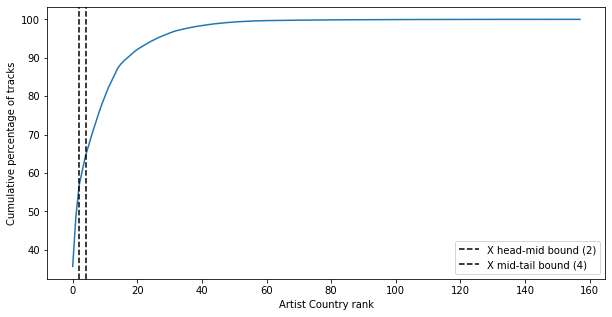

In [47]:
# Cumulative percentage - long tail
plt.figure(figsize=(10,5))
plt.plot(cum_pcnt)
plt.xlabel("Artist Country rank")
plt.ylabel("Cumulative percentage of tracks")
plt.axvline(x=2, linestyle="--", color="black", label="X head-mid bound (2)")
plt.axvline(x=4, linestyle="--", color="black", label="X mid-tail bound (4)")
plt.legend()
plt.grid(False)
plt.show()

In [48]:
head_mid_group = round(2**(2/3))
print(head_mid_group)

2


In [49]:
mid_tail_group = round(head_mid_group**(4/3))
print(mid_tail_group)

3


In [50]:
country_idf = country_total_final[['country_id','Code','idf_scores']].sort_values(by='country_id')

In [51]:
country_idf_all = country_total_final[['country_id','Code','idf_scores_all']].sort_values(by='country_id')

In [52]:
events_filtered = events_final[events_final['artist_country'].isin(country_total_30['Code'])]

In [53]:
events_filtered['artist_country_id'] = events_filtered['artist_country'].map(country_idf.set_index('Code')['country_id'])

In [54]:
track_idf = pd.merge(events_filtered, country_idf, left_on='artist_country_id', right_on='country_id')
track_idf_all = pd.merge(events_filtered, country_idf_all, left_on='artist_country_id', right_on='country_id')

In [55]:
track_idf = track_idf[['track_id','artist_id','idf_scores']].drop_duplicates()
track_idf_all = track_idf_all[['track_id','artist_id','idf_scores_all']].drop_duplicates()

In [56]:
#track_idf.to_csv('tracks_idf.csv', index=False)
#track_idf_all.to_csv('tracks_idf_all.csv', index=False)

In [57]:
events_filtered['group'] = np.select(
    [
        events_filtered['artist_country']=='US', 
        events_filtered['artist_country']=='GB',
        events_filtered['artist_country']=='DE',
        events_filtered['artist_country']=='SE',
        events_filtered['artist_country']=='RU',
        events_filtered['artist_country']=='ES'
    ], 
    [
        '1', 
        '2',
        '2',
        '2',
        '2',
        '2'
    ], 
    default='3'
)

In [58]:
#events_filtered[['user_id','artist_id','album_id','track_id','timestamp','artist_country_id','group']].to_csv('events_filtered.csv', index=False)

In [59]:
#country_idf.to_csv('country_idf.csv', index=False)

In [60]:
#country_total_30.to_csv('country_total_30.csv', index=False)

In [61]:
country_idf

,country_id,Code,idf_scores
1,1,AF,5.433338
4,4,DZ,3.836741
6,6,AD,4.412149
7,7,AO,4.530248
10,10,AG,6.035398
...,...,...,...
243,243,VG,4.637458
244,244,VI,4.327828
246,246,EH,4.831278
248,248,ZM,5.734368


In [62]:
country_unique_total = events_filtered[['track_id','artist_country']].drop_duplicates().groupby('artist_country').size().reset_index()
country_unique_total = country_unique_total.rename(columns={0:'count'})

In [63]:
country_unique_total['group'] = np.select(
    [
        country_unique_total['artist_country']=='US', 
        country_unique_total['artist_country']=='GB',
        country_unique_total['artist_country']=='DE',
        country_unique_total['artist_country']=='SE',
        country_unique_total['artist_country']=='RU',
        country_unique_total['artist_country']=='ES'
    ], 
    [
        '1', 
        '2',
        '2',
        '2',
        '2',
        '2'
    ], 
    default='3'
)

In [64]:
country_total_30['group'] = np.select(
    [
        country_total_30['Code']=='US', 
        country_total_30['Code']=='GB',
        country_total_30['Code']=='DE',
        country_total_30['Code']=='SE',
        country_total_30['Code']=='RU',
        country_total_30['Code']=='ES'
    ], 
    [
        '1', 
        '2',
        '2',
        '2',
        '2',
        '2'
    ], 
    default='3'
)

In [65]:
np.random.seed(21038875)
ms_events = events_filtered[events_filtered['user_id'].isin(ms['user_id'])]

In [66]:
#ms_events.to_csv('ms_events.csv', index=False)

In [67]:
np.random.seed(21038875)
beyms_events = events_filtered[events_filtered['user_id'].isin(beyms['user_id'])]

In [68]:
#beyms_events.to_csv('beyms_events.csv', index=False)

In [69]:
events_filtered_2 = events_filtered

In [70]:
tracks_group = events_filtered_2[['track_id','group']].drop_duplicates().reset_index()

In [71]:
#events_filtered_2[['track_id','artist_country','group']].drop_duplicates().to_csv('all_tracks_sample.csv', index=False)

In [72]:
country_unique_all = events_filtered_2[['track_id','artist_country']].drop_duplicates().groupby('artist_country').size().reset_index()
country_unique_all = country_unique_all.rename(columns={0:'count'})

### Statistics

In [73]:
events_filtered.describe()

,user_id,artist_id,album_id,track_id,timestamp,index,age,playcount,registered_unixtime,artist_country_id
count,1.668735e+07,1.668735e+07,1.668735e+07,1.668735e+07,1.668735e+07,1.668735e+07,1.668735e+07,1.668735e+07,1.668735e+07,1.668735e+07
mean,2.354032e+07,4.078814e+04,9.459619e+05,1.448733e+06,1.335334e+09,4.216479e+04,1.921431e+01,2.606665e+04,1.247021e+09,1.854887e+02
std,1.515331e+07,1.422832e+05,2.302657e+06,3.454734e+06,4.676375e+07,2.832883e+04,1.335499e+01,3.910045e+04,5.995199e+07,7.486688e+01
min,1.002693e+06,1.000000e+00,1.000000e+00,1.000000e+00,1.108341e+09,3.300000e+01,-1.000000e+00,-1.000000e+00,1.048091e+09,1.000000e+00
25%,9.435683e+06,3.004000e+03,2.928800e+04,1.049050e+05,1.312492e+09,1.896200e+04,1.700000e+01,5.711000e+03,1.203085e+09,1.120000e+02
50%,2.139100e+07,9.699000e+03,1.115030e+05,3.620680e+05,1.341322e+09,3.803700e+04,2.100000e+01,1.162000e+04,1.253200e+09,2.350000e+02
75%,3.664264e+07,2.831900e+04,4.922050e+05,1.131023e+06,1.370536e+09,6.016500e+04,2.500000e+01,3.223600e+04,1.295978e+09,2.360000e+02
max,5.090012e+07,3.180735e+06,1.595318e+07,3.221552e+07,1.409616e+09,1.203180e+05,1.120000e+02,7.595380e+05,1.342887e+09,2.490000e+02


In [74]:
events_filtered['user_id'].drop_duplicates().count()

4147

In [75]:
len(ms_events)+len(beyms_events)

16687354

In [76]:
len(beyms_events)

7941784

In [77]:
len(ms_events)+len(beyms_events)

16687354

In [78]:
events_filtered['track_id'].drop_duplicates().count()

1084921

In [79]:
events_filtered[['user_id','track_id']].drop_duplicates().groupby('user_id').size().describe()

count    4147.000000
mean     1285.129732
std       843.196908
min         6.000000
25%       664.500000
50%      1128.000000
75%      1707.000000
max      5938.000000
dtype: float64

In [80]:
country_unique_all.sort_values('count', ascending=False).describe()

,count
count,158.000000
mean,6866.588608
std,33924.841542
min,1.000000
25%,15.250000
50%,65.000000
75%,1406.250000
max,387019.000000


In [81]:
beyms_events[['track_id','artist_country']].drop_duplicates().groupby('artist_country').size()

artist_country
AD     29
AE     21
AF      4
AM     45
AO     15
     ... 
VG     19
VI     29
WS     25
ZA    643
ZW      6
Length: 149, dtype: int64

In [82]:
beyms_events['track_id'].drop_duplicates()

0               53
54              86
141            182
203            289
249            310
            ...   
3300928    8851152
3300929    8851227
3300930    2253120
3300931    5712738
3300932    2253122
Name: track_id, Length: 799658, dtype: int64

In [83]:
ms_events[['track_id','artist_country']].drop_duplicates().groupby('artist_country').size()

artist_country
AD     37
AE     15
AG      1
AM     18
AO     23
     ... 
VI     35
WS      7
ZA    676
ZM      2
ZW      5
Length: 151, dtype: int64

In [84]:
ms_events['track_id'].drop_duplicates()

5209           6734
5233           6848
5308           7069
5317           7084
5328           7095
             ...   
3300460     2596563
3300463     3170518
3300465     4764048
3300470    13502462
3300471     9156714
Name: track_id, Length: 707005, dtype: int64

In [85]:
country_total_30[['country_id','Code','track_id','users','idf_scores','group']].sort_values('track_id', ascending=False).head(10)

,country_id,Code,track_id,users,idf_scores,group
236,236,US,387019.0,814.0,0.447666,1
235,235,GB,141765.0,373.0,0.883829,2
83,83,DE,87417.0,362.0,1.093802,2
215,215,SE,42855.0,87.0,1.403397,2
183,183,RU,41152.0,442.0,1.421007,2
209,209,ES,30681.0,88.0,1.548529,2
40,40,CA,30412.0,82.0,1.552353,3
76,76,FR,28967.0,70.0,1.573495,3
32,32,BR,28056.0,288.0,1.587372,3
75,75,FI,26165.0,101.0,1.617677,3


In [86]:
print(country_total_30.sort_values('track_id', ascending=False).query('group=="3"')['Code'].to_list())

['CA', 'FR', 'BR', 'FI', 'IT', 'NL', 'AU', 'PL', 'NO', 'BE', 'UA', 'CH', 'DK', 'JP', 'MX', 'AT', 'TR', 'JM', 'CZ', 'IE', 'BY', 'AR', 'HU', 'CL', 'HR', 'NZ', 'GR', 'ID', 'IL', 'CN', 'PT', 'IS', 'BG', 'LT', 'CO', 'SK', 'RS', 'EE', 'IR', 'ZA', 'CU', 'RO', 'VE', 'PR', 'LV', 'KR', 'TW', 'IN', 'ML', 'SI', 'PH', 'SG', 'UY', 'NG', 'DZ', 'SN', 'MT', 'MK', 'FO', 'CM', 'EG', 'CV', 'LB', 'GT', 'MY', 'BM', 'PE', 'LU', 'BA', 'DO', 'PK', 'MD', 'CD', 'CI', 'MA', 'TN', 'CY', 'VI', 'AM', 'ET', 'GY', 'GN', 'AD', 'NI', 'KG', 'BB', 'KE', 'RE', 'PA', 'SA', 'CR', 'GH', 'AO', 'SY', 'BS', 'HT', 'PS', 'AE', 'BJ', 'WS', 'VG', 'TT', 'NE', 'SM', 'UZ', 'EC', 'IM', 'GE', 'GP', 'MZ', 'GD', 'EH', 'KZ', 'JE', 'ZW', 'MQ', 'MW', 'ME', 'SB', 'GM', 'LI', 'JO', 'MN', 'HN', 'MV', 'BI', 'PY', 'MR', 'NP', 'MG', 'BO', 'BF', 'BD', 'GF', 'AF', 'MC', 'SO', 'OM', 'GI', 'BH', 'ZM', 'SS', 'AZ', 'TH', 'ST', 'AG', 'TJ', 'CG', 'DM', 'RW', 'GW', 'IQ']


In [87]:
ms_b_grp = ms_events[['user_id','track_id','group']].drop_duplicates().groupby(['user_id','group']).size().reset_index().groupby(['user_id','group']).sum().reset_index()
ms_b_tl = ms_events[['user_id','track_id','group']].drop_duplicates().groupby(['user_id']).size().reset_index()
ms_b_grp = ms_b_grp.rename(columns={0:'count'})
ms_b_tl = ms_b_tl.rename(columns={0:'total'})

In [88]:
ms_b = pd.merge(ms_b_grp, ms_b_tl, on='user_id', how='left')

In [89]:
ms_b['pct'] = ms_b['count']/ms_b['total']*100

In [90]:
round(ms_b.groupby('group').sum()/len(ms_b['user_id'].drop_duplicates()),2)

,user_id,count,total,pct
group,,,,
1,23572045.5,648.81,1421.61,44.48
2,23535532.1,423.44,1421.47,29.11
3,23593277.5,349.40,1421.65,26.41


In [91]:
beyms_b_grp = beyms_events[['user_id','track_id','group']].drop_duplicates().groupby(['user_id','group']).size().reset_index().groupby(['user_id','group']).sum().reset_index()
beyms_b_tl = beyms_events[['user_id','track_id','group']].drop_duplicates().groupby(['user_id']).size().reset_index()
beyms_b_grp = beyms_b_grp.rename(columns={0:'count'})
beyms_b_tl = beyms_b_tl.rename(columns={0:'total'})
beyms_b = pd.merge(beyms_b_grp, beyms_b_tl, on='user_id', how='left')
beyms_b['pct'] = beyms_b['count']/beyms_b['total']*100
round(beyms_b.groupby('group').sum()/len(beyms_b['user_id'].drop_duplicates()),2)

,user_id,count,total,pct
group,,,,
1,25635858.40,518.88,1148.49,43.06
2,25561764.59,329.93,1148.39,28.47
3,25636110.43,299.73,1148.48,28.47


###  Original dataset features distribution

In [92]:
acoustic_features_df = pd.read_csv('data/acoustic_features_lfm_id.tsv', sep='\t')

In [93]:
from sklearn.preprocessing import MinMaxScaler
acoustic_features_df = acoustic_features_df[acoustic_features_df['track_id'].isin(events_filtered['track_id'].drop_duplicates())].set_index('track_id')
acoustic_features_df = acoustic_features_df[["danceability", "energy", "speechiness", "acousticness", "instrumentalness", "tempo", "valence", "liveness"]]
acoustic_features_df = pd.DataFrame(index=acoustic_features_df.index, columns=acoustic_features_df.columns, data=MinMaxScaler().fit_transform(acoustic_features_df))



In [94]:
events_filtered['group_name'] = np.select(
    [
        events_filtered['group']=='1', 
        events_filtered['group']=='2',
        events_filtered['group']=='3'

    ], 
    [
        'Group head', 
        'Group mid',
        'Group tail'
    ], 
)

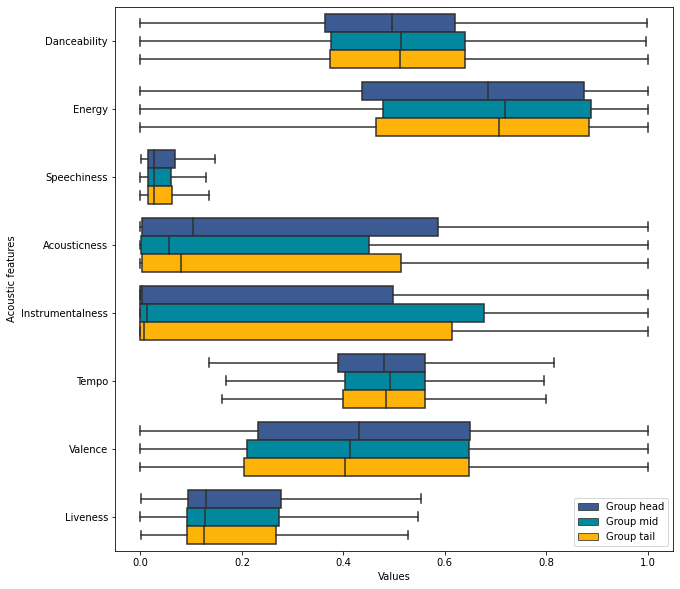

In [95]:
# Acoustic features in the original dataset
df = acoustic_features_df.copy()
df.columns = [feature.capitalize() for feature in df.columns]
df = df.stack().reset_index()
df.columns = ["track_id", "feature", "value"]
df = df.merge(events_filtered[['track_id', 'group_name']].drop_duplicates(), on='track_id')
f = plt.figure(figsize=[10,10])
g = sns.boxplot(data=df, x="value", y="feature", hue="group_name", showfliers=False, palette=palette, saturation=1, hue_order=['Group head', 'Group mid', 'Group tail'])
g.legend_.set_title("")

plt.legend(loc="lower right")
plt.xlabel("Values")
plt.ylabel("Acoustic features")
plt.grid(False)

In [96]:
group_x_user_country = events_filtered[['user_id','track_id', 'country', 'group']].groupby(['group','country']).size().reset_index()
group_x_user_country = group_x_user_country.rename(columns={0:'count'})

In [97]:
group_x_user_country[(group_x_user_country['country']=='US')]['count']/3607750*100

45     70.828965
92     14.948708
139    14.222327
Name: count, dtype: float64

In [98]:
group_x_user_country.groupby('group').sum()/group_x_user_country['count'].sum()*100

,count
group,
1,44.840662
2,28.749357
3,26.409981


In [99]:
group_x_user_country.groupby('country').sum().sort_values('count', ascending=False).head(10)

,count
country,
US,3607750
GB,1716139
RU,1492136
DE,1485245
PL,1119884
BR,1073447
FI,468426
NL,452630
AU,452042


In [100]:
#group_x_user_country

countries = np.array(group_x_user_country[(group_x_user_country['group']=="1")]['country'])
g1 = np.array(group_x_user_country[(group_x_user_country['group']=="1")]['count'])
g2 = np.array(group_x_user_country[(group_x_user_country['group']=="2")]['count'])
g3 = np.array(group_x_user_country[(group_x_user_country['group']=="3")]['count'])


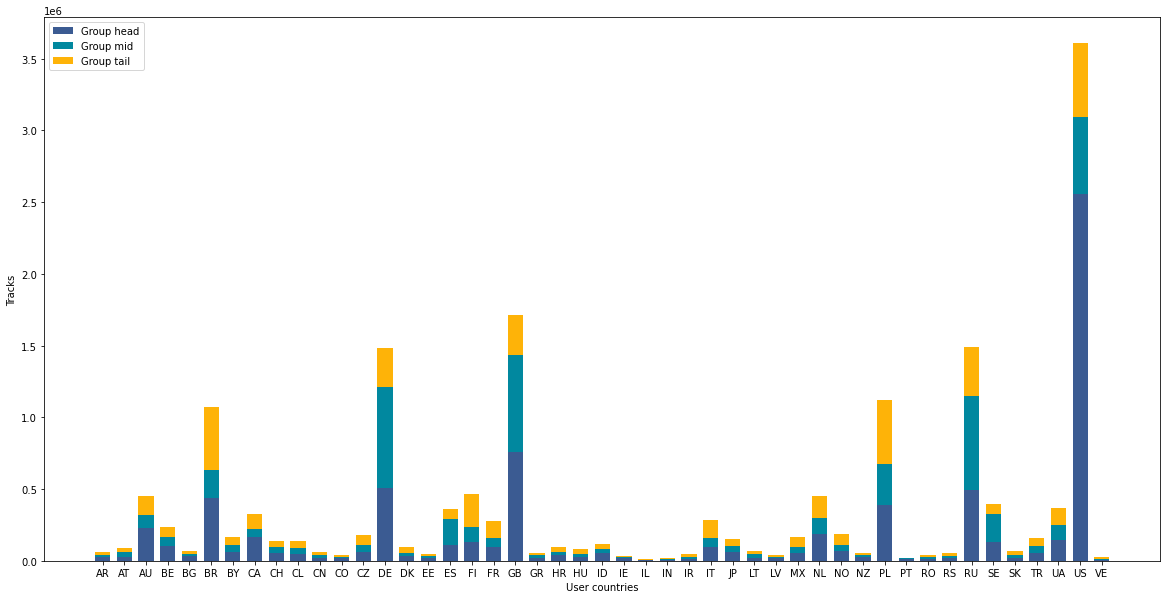

In [101]:
# Distibution number of tracks per country by groups
plt.figure(figsize=[20,10])

width = 0.7
plt.bar(countries, g1, width, color="#3b5b92", label='Group head')
plt.bar(countries, g2, width, bottom=g1, color="#01889f", label='Group mid')
plt.bar(countries, g3, width, bottom=g1+g2, color="#feb308", label='Group tail')

plt.legend(loc="upper left")


plt.xlabel("User countries")
plt.ylabel("Tracks")
plt.show()